# Unsupervised Learning: Clustering

## K-Means Clustering

Let’s load the Iris data and assume for a moment that the species column is
missing—we have the measured values for sepal length/width and petal length/width
but we do not know how many species exist.
Now let’s use unsupervised learning (clustering) to find out how many species exist.
The goal here is to group all similar items into a cluster. We can assume a k of 3 for now

In [ ]:
#k-means Clustering
# Import neccerssary packages

from sklearn import datasets
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()


In [ ]:
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])

# np.c_ Translates slice objects to concatenation along the second axis 
#in particular, arrays will be stacked along their last axis after being upgraded to at least 2-D with 1’s post-pended to the shape

In [ ]:
# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ',"")
iris.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Declaring independent and dependent variables
X = iris.iloc[:,:3] # independent variables
y = iris.species # dependent variable

# Normalizing data
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
X

In [ ]:
# K Means Cluster
model = KMeans(n_clusters=3, random_state=11)
model.fit(X)
print (model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


We see that the clustering algorithm has assigned a cluster label for each record.
Let’s compare this with the actual species label to understand the accuracy of grouping
similar records

In [ ]:
#Accuracy of k-means Clustering

# since its unsupervised the labels have been assigned not in line with the actual lables so let's convert all the 1s to 0s and 0s to 1s 2's look fine

iris['pred_species'] = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

In [ ]:
# Accuracy metrics
print ("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))

print ("Classification report :", metrics.classification_report(iris.species, iris.pred_species))

Accuracy : 0.8066666666666666
Classification report :               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.71      0.70      0.71        50
         2.0       0.71      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [ ]:
iris

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species,pred_species
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,0
2,4.7,3.2,1.3,0.2,0.0,0
3,4.6,3.1,1.5,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,2
146,6.3,2.5,5.0,1.9,2.0,1
147,6.5,3.0,5.2,2.0,2.0,2
148,6.2,3.4,5.4,2.3,2.0,2


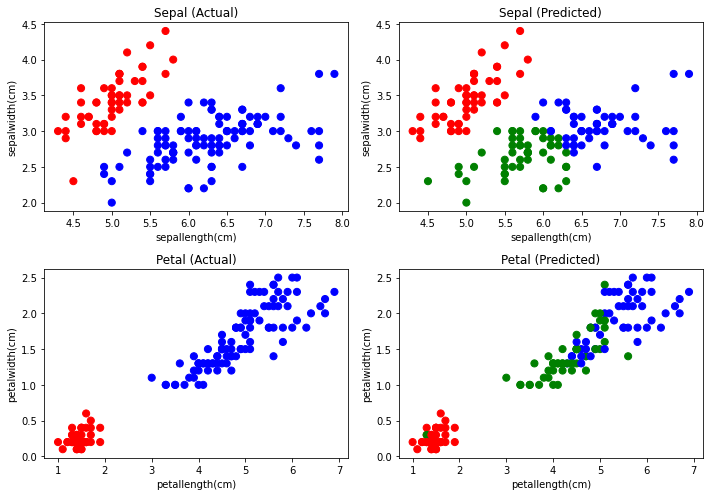

In [ ]:
# Set the size of the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

# Create a colormap for red, green and blue
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'g', 'b'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')

plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.pred_species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.pred_species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')

plt.title('Petal (Predicted)')
plt.tight_layout()

In [ ]:
iris.pred_species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    1
147    2
148    2
149    1
Name: pred_species, Length: 150, dtype: int64

### Elbow Method


In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1.

In [ ]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
# Compute average euclidean distance between each point and its cluster centroid
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
# np.argmin returns the indices of the minimum values along an axis.
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]


# Total with-in sum of square
# WCSS - Within-Cluster Sum of Square 
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100
kIdx = 10-1


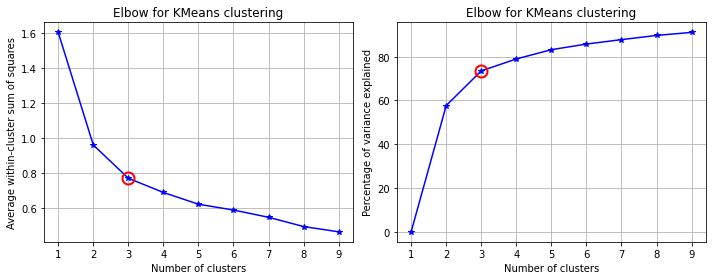

In [ ]:
kIdx = 2
# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

# Silhouette Method


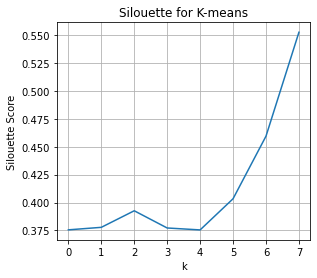

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
score = []
for n_clusters in range(2,10):
 kmeans = KMeans(n_clusters=n_clusters)
 kmeans.fit(X)
 labels = kmeans.labels_
 centroids = kmeans.cluster_centers_
 score.append(silhouette_score(X, labels, metric='euclidean'))
score.reverse()
 # Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")
# Create KMeans instance for different number of clusters
# Initialize the clusterer with n_clusters value and a random generator
model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
model.fit_predict(X)
cluster_labels = np.unique(model.labels_)
n_clusters = cluster_labels.shape[0]



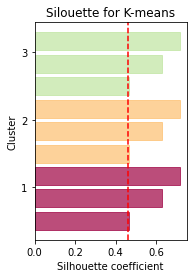

In [ ]:
# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, model.labels_)
plt.subplot(1, 2, 2)

# Get spectral values for colormap.
cmap = cm.get_cmap("Spectral")
y_lower, y_upper = 0,0
yticks = []

for i, c in enumerate(cluster_labels):
 c_silhouette_vals = silhouette_vals[cluster_labels]
 c_silhouette_vals.sort()
 y_upper += len(c_silhouette_vals)
 color = cmap(float(i) / n_clusters)
 plt.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
 yticks.append((y_lower + y_upper) / 2)
 y_lower += len(c_silhouette_vals)
 
silhouette_avg = np.mean(silhouette_vals)
plt.yticks(yticks, cluster_labels+1)

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silouette for K-means")
plt.show()

# Hierarchical Clustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Cluster
model = AgglomerativeClustering(n_clusters=3)

# lets fit the model to the iris data
model.fit(X)
print(model.labels_)
iris['pred_species'] = model.labels_
print("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print("Classification report :", metrics.classification_report(iris.
species, iris.pred_species))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy : 0.7733333333333333
Classification report :               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.64      0.74      0.69        50
         2.0       0.70      0.60      0.65        50

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150



Hierarchical clusterings result arrangement can be better interpreted with
dendogram visualization. SciPy provides necessary functions for dendogram
visualization. Currently, Scikit-learn lacks these functions.

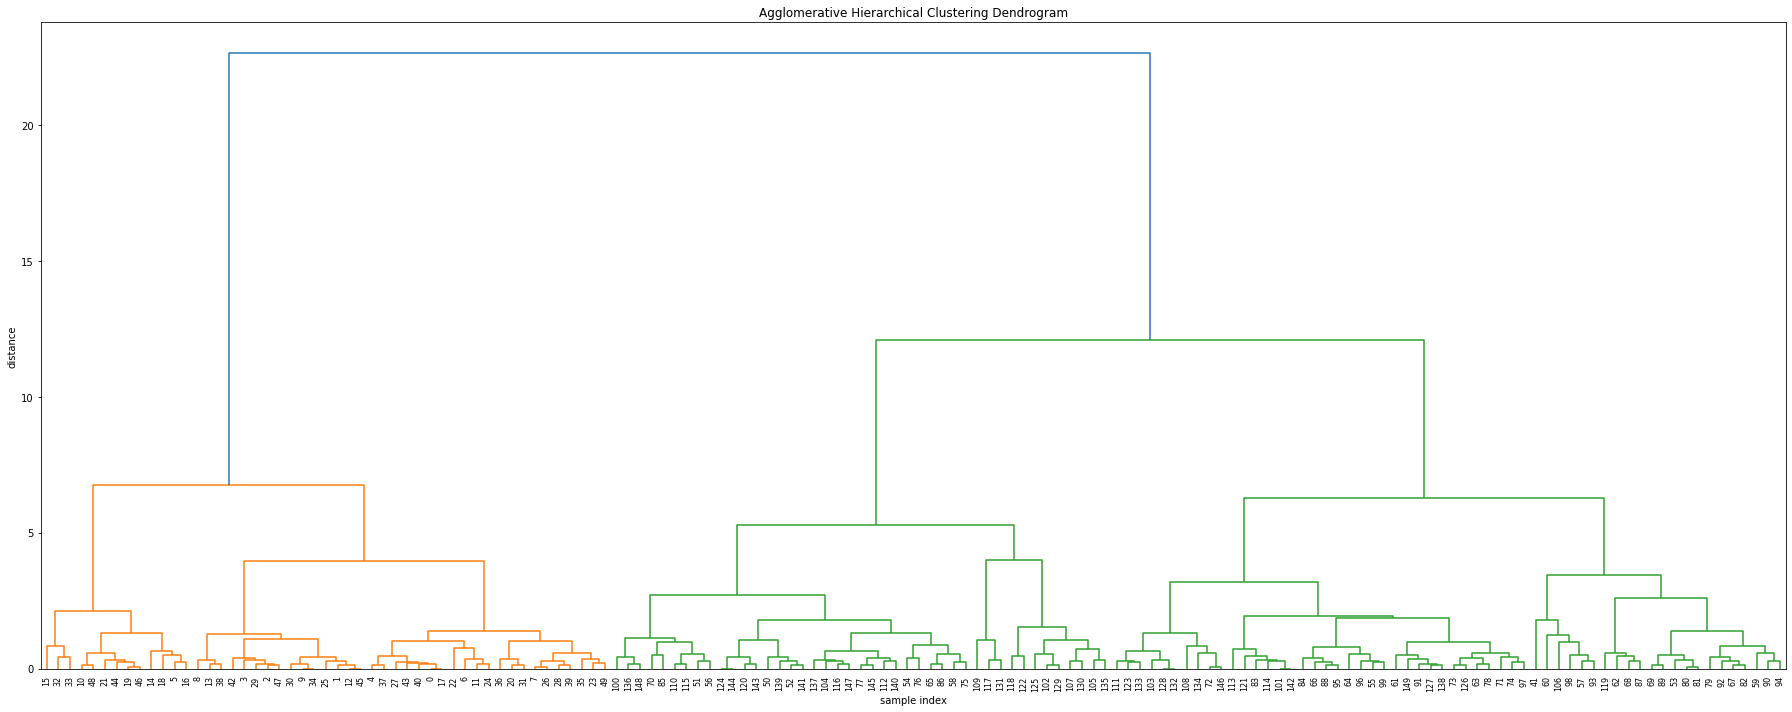

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
 Z,
 leaf_rotation=90., # rotates the x axis labels
 leaf_font_size=8., # font size for the x axis labels
)
plt.tight_layout()

## Principal Component Analysis


In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris.data



In [ ]:
# standardize data
X_std = StandardScaler().fit_transform(X)

# create covariance matrix
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
# sort eigenvalues in decreasing order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cummulative Variance Explained", cum_var_exp)

Cummulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


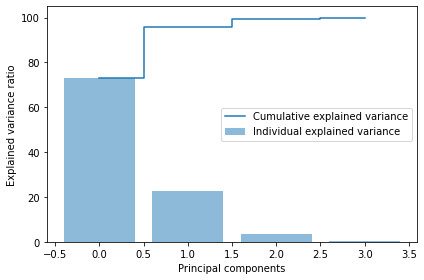

In [ ]:
# Visualize
plt.figure(figsize=(6, 4))
plt.bar(range(4), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In the preceding plot, we can see that the first three principal components explain
99% of the variance. Let’s perform PCA using Scikit-learn and plot the 1st three
eigenvectors.

# Visualize PCA


In [ ]:
# Impport data
# source: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
Y = iris.target



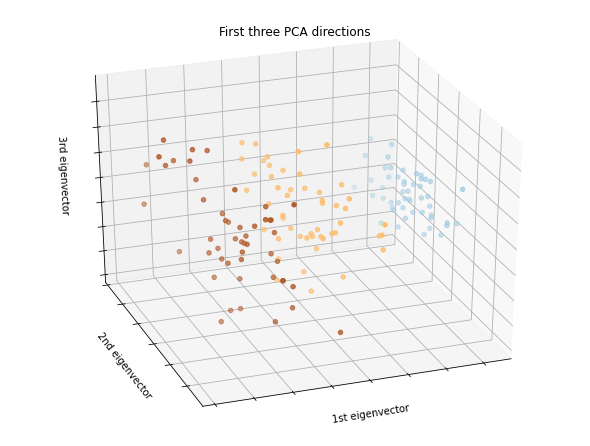

In [ ]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()